https://i.imgur.com/VWlZg6X.png


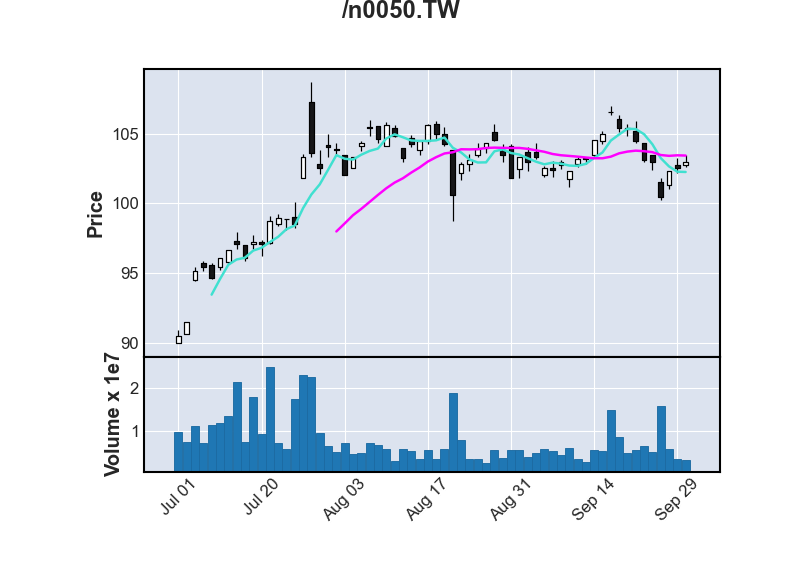

In [45]:
import pandas_datareader.data as web
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#讀取yahoo財經
df = web.DataReader('0050.tw', 'yahoo', '2020-07-01')
import mplfinance as mpf

#繪製K線圖
mpf.plot(df, type='candle', mav=(5,20), volume=True, title='/n0050.TW', savefig='test_plot.png')
from IPython.display import Image
from IPython.core.display import HTML 

#顯示本機圖片
Image("test_plot.png")
import pyimgur

CLIENT_ID = "0a5b5c23df1a717"
PATH = "test_plot.png"

#上傳圖片
im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(PATH, title="Uploaded with PyImgur")
print(uploaded_image.link)

#顯示雲端圖床圖片
from IPython.display import Image
from IPython.core.display import HTML 
Image(uploaded_image.link) 

In [26]:
CLIENT_ID = "0a5b5c23df1a717"
upload_to_imgur(CLIENT_ID)
start_date = (datetime.datetime.now() - datetime.timedelta(60)).strftime("%Y-%m-%d")
start_date

'https://i.imgur.com/PXDFHAZ.png'

In [141]:
stock_code = '0050.tw'
mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)
mav=(3,6,9)
mpf.plot(df,
         type='candle',
         style=s,
         volume = True ,
         mav=mav,
         xrotation=0,
         panel_ratios=(3,1),
         figratio=(20,10),
         figscale=1.5,
         scale_width_adjustment = dict(lines=1),
         update_width_config = dict(candle_width = 0.85),
         title='\n\nTWSE\nStock Code:{}'.format(stock_code),
         savefig='test_plot.png')

In [165]:
import pandas_datareader.data as web

def upload_to_imgur(CLIENT_ID, savefig):
    im = pyimgur.Imgur(CLIENT_ID)
    uploaded_image = im.upload_image(savefig, title="")
    return uploaded_image.link
def plot_candlestick(stock_code, span, CLIENT_ID, savefig):
    start_date = (datetime.datetime.now() - datetime.timedelta(span)).strftime("%Y-%m-%d")
    df = web.DataReader(stock_code, 'yahoo', start_date)
    mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
    s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)
    mav=(3,6,9)
    mpf.plot(df,
             type='candle',
             style=s,
             volume = True ,
             mav=mav,
             xrotation=0,
             panel_ratios=(3,1),
             figratio=(20,10),
             figscale=1.5,
             scale_width_adjustment = dict(lines=1),
             update_width_config = dict(candle_width = 0.85),
             title='\n\nTWSE\nStock Code:{}'.format(stock_code),
             savefig=savefig)
    url = upload_to_imgur(CLIENT_ID, savefig)
    return url

In [168]:
CLIENT_ID = "0a5b5c23df1a717"
savefig = 'test_plot.png'
plot_candlestick('0050.tw', 90, CLIENT_ID, savefig)

'https://i.imgur.com/kTuBUVP.png'

In [22]:
CLIENT_ID = "0a5b5c23df1a717"
savefig = 'test_plot.png'
upload_to_imgur(CLIENT_ID, savefig)

NameError: name 'upload_to_imgur' is not defined

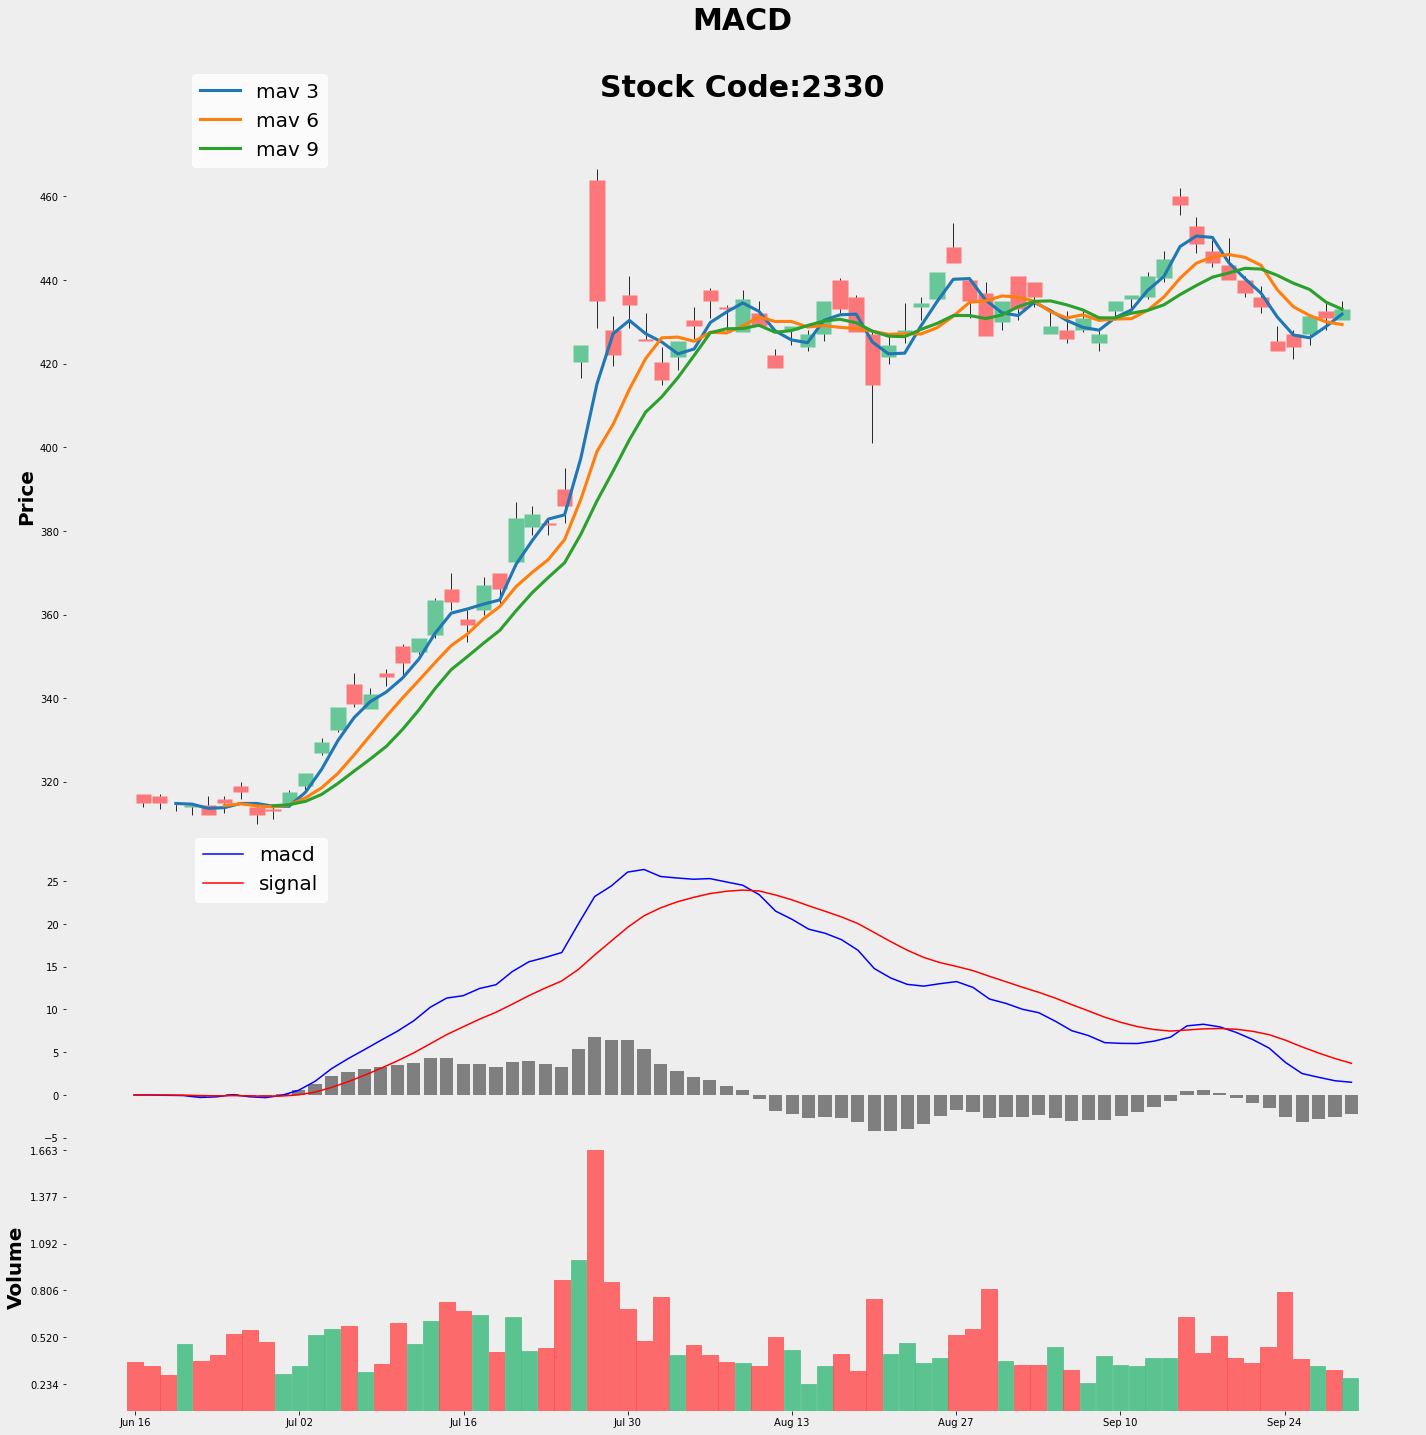

In [23]:
import mplfinance as mpf
import matplotlib.pyplot as plt 
import MySQLdb
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
import pandas_datareader.data as web

mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)

exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

macd = exp12 - exp26

signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_axes([0.05,0.4,0.94,0.5])
ax2 = fig.add_axes([0.05,0.015,0.94,0.2])
ax3 = fig.add_axes([0.05,0.2,0.94,0.2])

strDate = [str(e).split(' ')[0] for e in df['Close'].index]
plt.bar(strDate, histogram, color = '#7f7f7f')
plt.plot(strDate, macd, color = 'b')
plt.plot(strDate, signal, color = 'r')

mav = (3,6,9)
mpf.plot(df,
         type='candle',
         style=s,
         volume=ax2,
         mav=mav,
         panel_ratios=(4,1),
         xrotation=0,
         ax = ax1,
         update_width_config = dict(candle_width = 0.95),
         scale_width_adjustment = dict(lines=2))
ax1.legend(['mav '+str(mav[0]),'mav '+str(mav[1]),'mav '+str(mav[2])],
           loc='best', 
           bbox_to_anchor=(0.2, 1.1),
           fontsize = 20,
           frameon = True,
           edgecolor = 'w',
           facecolor = 'w')
ax3.legend(['macd','signal'],
           loc='best', 
           bbox_to_anchor=(0.2, 1.1),
           fontsize = 20,
           frameon = True,
           edgecolor = 'w',
           facecolor = 'w')
ax1.set_title(
    label = 'MACD\n\nStock Code:2330\n',
    fontdict={'fontsize':30,
              'fontweight':'bold',
              'color':'k'},
    loc='center')
ax1.set_ylabel('Price',fontdict={'weight': 'bold', 'size': 20})
ax2.set_ylabel('Volume',fontdict={'weight': 'bold', 'size': 20})
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()
yticks = np.arange(min(df['Volume']), max(df['Volume']), round( (max(df['Volume']) - min(df['Volume']))/5 ))
ax2.set_yticks(yticks)
ax1.set_xticks([])
ax3.set_xticks([])
ax1.set(frame_on=False)
ax2.set(frame_on=False)
ax3.set(frame_on=False)
plt.savefig(savefig, dpi=300)

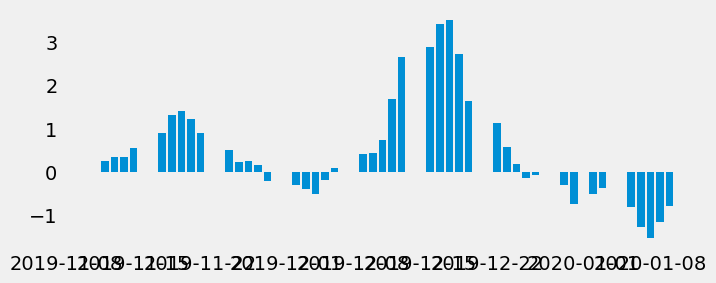

In [75]:
fig = plt.figure()
ax1 = fig.add_axes([0,0.3,1,0.5])
plt.bar(df['Close'].index, histogram)
plt.show()

In [107]:
df['Close'].index

DatetimeIndex(['2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22', '2019-11-25', '2019-11-26',
               '2019-11-27', '2019-11-28', '2019-11-29', '2019-12-02',
               '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06',
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [15]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-16,317.0,314.0,317.0,315.0,36608216.0,310.794189
2020-06-17,317.0,313.5,316.5,315.0,34522968.0,310.794189
2020-06-18,315.0,313.0,314.5,314.5,29044474.0,312.783295
2020-06-19,314.5,312.0,314.0,314.5,48130280.0,312.783295
2020-06-22,316.5,312.0,314.5,312.0,37374616.0,310.296936
...,...,...,...,...,...,...
2020-09-24,429.0,423.0,425.5,423.0,79806381.0,423.000000
2020-09-25,428.0,421.0,427.0,424.0,38775269.0,424.000000
2020-09-28,431.5,424.5,427.0,431.5,34156973.0,431.500000


In [24]:
import pyimgur
im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(savefig, title="")
uploaded_image.link

'https://i.imgur.com/AtswAGI.png'

In [34]:

msg = input()
if re.match('C', msg):
    print('C')
elif re.match('macd', msg):
    print(msg[4:20])

macd2330.tw
2330.tw


In [30]:
import regex as re